In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from tensorflow import keras

In [2]:
model = keras.models.Sequential([
    keras.Input(shape=(22,)),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(1, activation="sigmoid")
])

In [3]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [4]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │           230 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 461 (1.80 KB)

 Trainable params: 461 (1.80 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
data = pd.read_csv('../assets/parkinsons.csv')

In [6]:
data = data.drop(columns=['name'])

In [7]:
label = data[['status']]

In [8]:
data = data.drop(columns=["status"])

In [9]:
X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=0.1, random_state=42, stratify=label)

In [10]:
history = model.fit(X_train, y_train, epochs=250, batch_size=1, validation_split=0.1)

Epoch 1/250
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5760 - val_loss: 0.1172
Epoch 2/250
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2775 - val_loss: 0.1645
Epoch 3/250
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2841 - val_loss: 0.1646
Epoch 4/250
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3013 - val_loss: 0.1603
Epoch 5/250
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2570 - val_loss: 0.1533
Epoch 6/250
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2336 - val_loss: 0.1827
Epoch 7/250
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2354 - val_loss: 0.1425
Epoch 8/250
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1986 - val_loss: 0.1377
Epoch 9/250
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1812 - val_loss: 0.2394
Epoch 10/250
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1845 - val_loss: 0.1596
Epoch 11/250
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2101 - val_loss: 0.1310
Epoch 12/250
157/157 ━━━━━━━━━━━━━━━━━━━━

In [11]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


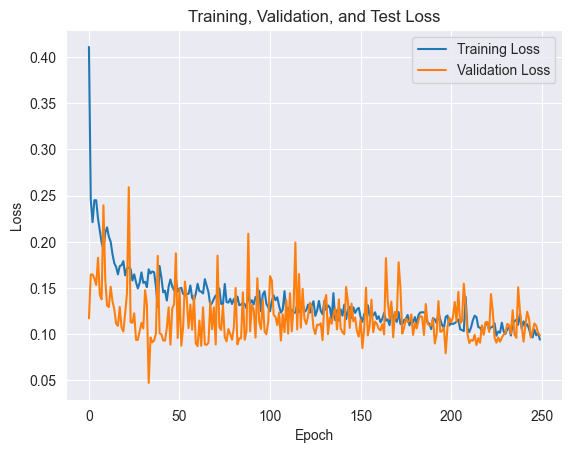

In [12]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training, Validation, and Test Loss')
plt.legend()
plt.show()

In [13]:
cm = confusion_matrix(y_test, y_pred)

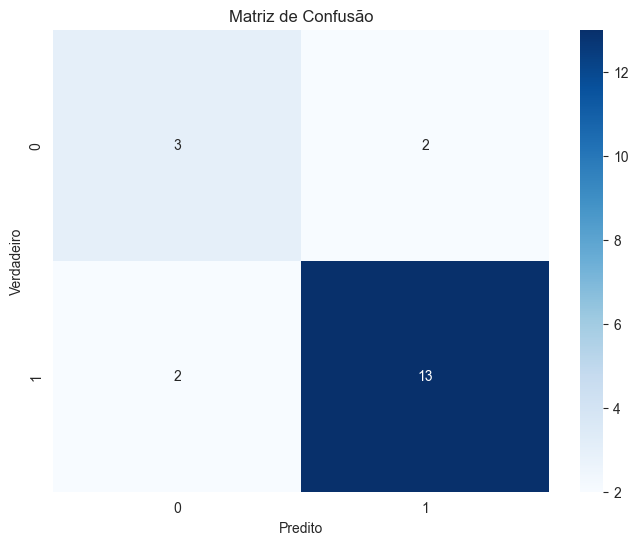

In [14]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusão")
plt.xlabel("Predito")
plt.ylabel("Verdadeiro")
plt.show()